<a href="https://colab.research.google.com/github/ShrijaVarma/cartoon-effect-on-images/blob/main/cartoon_effect_on_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries:
# cv2 - OpenCV library for image processing
# numpy - for numerical operations and array manipulations
# matplotlib.pyplot - for displaying images and plotting data
import cv2
import numpy as np
import matplotlib.pyplot as plt

LOAD IMAGE

In [ ]:
def read_file(filename):

    # Read the image from the given filename using OpenCV
    img = cv2.imread(filename)
    if img is None:
        print("Image not loaded. Check filename or file format.")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return img

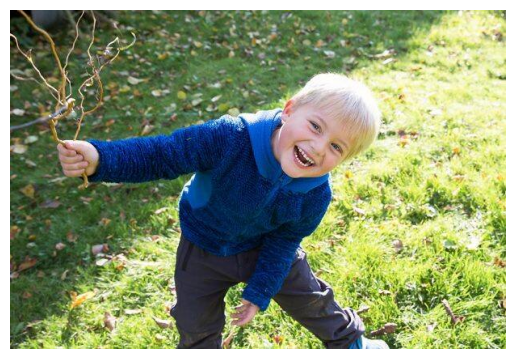

Image shape: (420, 614, 3)


In [ ]:
filename = "images.jpg"
img = read_file(filename)

if img is not None:
    print("Image shape:", img.shape)



Create edge Mask


In [ ]:
def edge_mask(img, line_size, blue_value):
    """
    Input: input image
    Output: Edges of Images
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY, line_size, blue_value )
    return edges



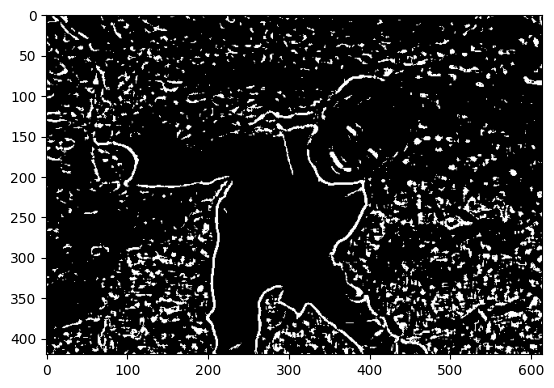

In [ ]:
line_size, blur_value = 7,7
edges = edge_mask(img , line_size, blur_value)
plt.imshow(edges, cmap = "binary")
plt.show()

Reduce the color Palette

In [ ]:
def color_quantization(img, k):
    # Transform the image
    data = np.float32(img).reshape((-1, 3))

    # Determine criteria for k-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    # Implementing k-means clustering
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert cluster centers to uint8 and reshape to image format
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result


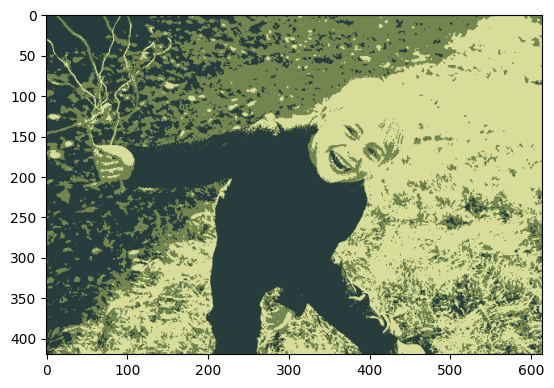

In [ ]:
img = color_quantization(img, k=3)
plt.imshow(img)
plt.show()

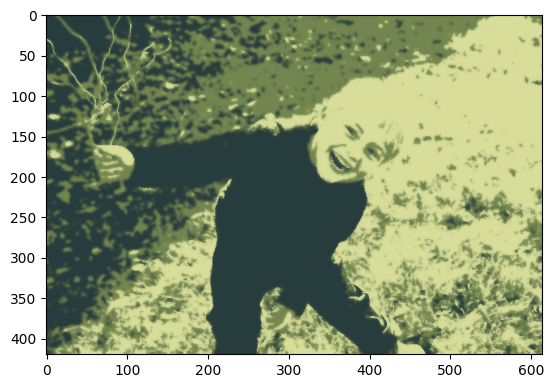

In [ ]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor= 200, sigmaSpace = 200)
plt.imshow(blurred)
plt.show()

Combine edge Mask with the quantiz img

In [ ]:

def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask=edge)
    plt.imshow(c)
    plt.show()





In [ ]:

cartoon()


error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'bitwise_and'
> Overload resolution failed:
>  - mask is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'mask'
